In [18]:
# 从数据
import pandas as pd
import os

if os.path.exists("./data/processed_data.csv"):
    print("data already processed")
    data = pd.read_csv('./data/processed_data.csv')
else:
    sheet_datas = []
    sheets = ["材料1", "材料2", "材料3", "材料4"]
    for sheet in sheets:
        sheet_data = pd.read_excel('./data/附件一（训练集）.xlsx', sheet_name=sheet)
        sheet_data["磁芯材料"] = sheet
        sheet_datas.append(sheet_data)

    data = pd.concat(sheet_datas, axis=0)
    data = data.reset_index(drop=True)
    # 存为 csv
    data.to_csv('./data/processed_data.csv', index=False)

data already processed


In [19]:
feature_selected = ["温度，oC", "磁芯材料", "励磁波形", "磁芯损耗，w/m3"]
map_dict = {"磁芯材料": {"材料1": 1, "材料2": 2, "材料3": 3, "材料4": 4},
            "励磁波形": {"正弦波": 1, "三角波": 2, "梯形波": 3},
            }

data = data[feature_selected]
for key, value in map_dict.items():
    data.loc[:, key] = data.loc[:, key].map(value)

In [20]:
print(data.shape)
data.head()

(12400, 4)


,温度，oC,磁芯材料,励磁波形,磁芯损耗，w/m3
0,25,1,1,1997.955250
1,25,1,1,2427.749830
2,25,1,1,3332.725760
3,25,1,1,4502.908007
4,25,1,1,6063.023248


In [21]:
data['磁芯材料'].describe()

count     12400
unique        4
top           1
freq       3400
Name: 磁芯材料, dtype: int64

In [22]:
x = data.drop(columns=["磁芯损耗，w/m3"])
y = data["磁芯损耗，w/m3"]

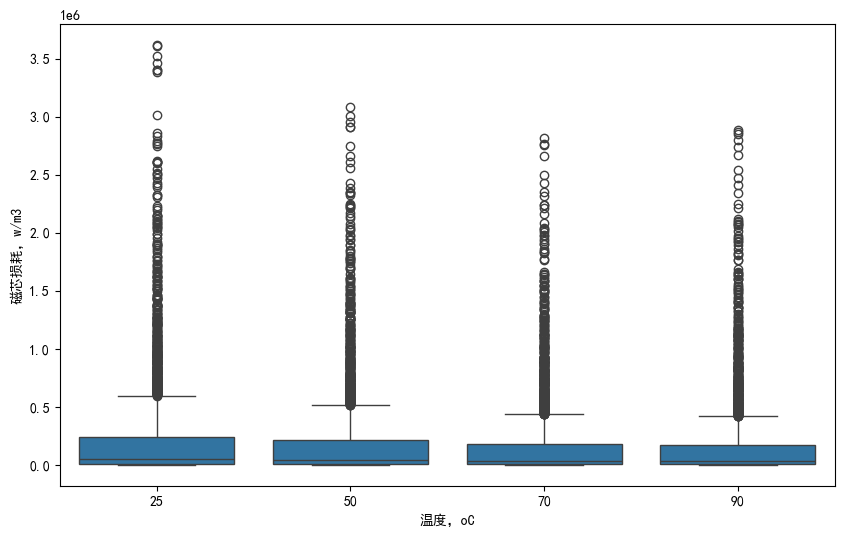

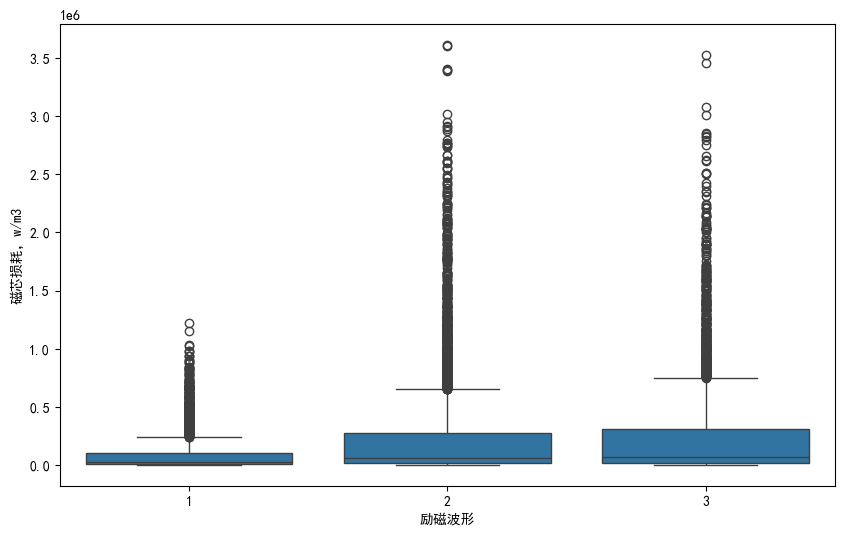

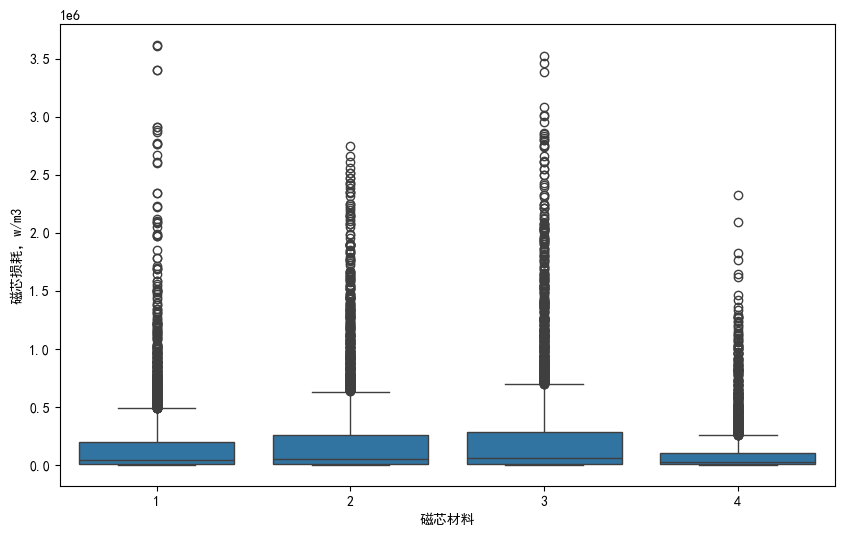

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# matplotlib 恢复默认设置
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# 温度对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x='温度，oC', y='磁芯损耗，w/m3', data=data)
# plt.title('温度对磁芯损耗的影响')
plt.show()

# 励磁波形对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x='励磁波形', y='磁芯损耗，w/m3', data=data)
# plt.title('励磁波形对磁芯损耗的影响')
plt.show()

# 磁芯材料对磁芯损耗的影响
plt.figure(figsize=(10, 6))
sns.boxplot(x='磁芯材料', y='磁芯损耗，w/m3', data=data)
# plt.title('磁芯材料对磁芯损耗的影响')
plt.show()

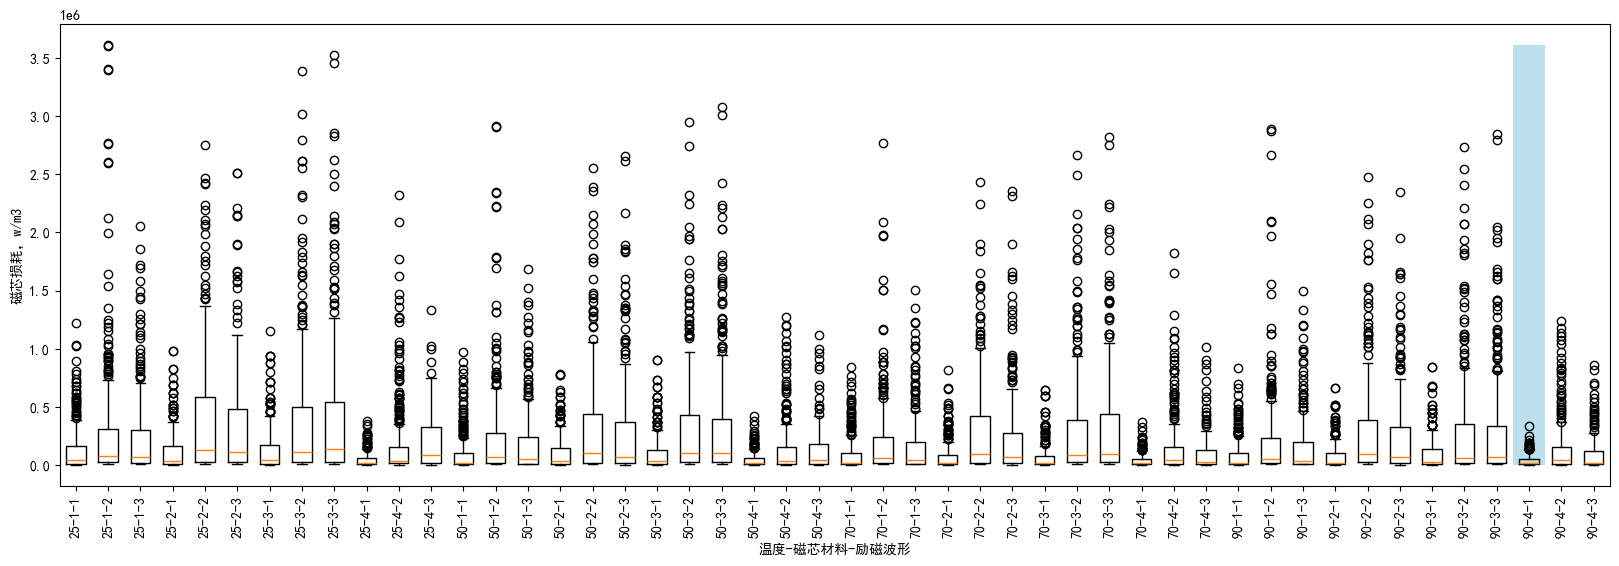

In [24]:
import matplotlib.patches as patches

# 遍历所有的自变量组合画出 boxplot 图像
temp_data = data.sort_values(by=['温度，oC', '磁芯材料', '励磁波形'])
group = temp_data.groupby(['温度，oC', '磁芯材料', '励磁波形'])

mean_group = group.mean()
std_group = group.std()

# 找到 mean_group 中均值最小的那一行
min_mean_index = mean_group['磁芯损耗，w/m3'].idxmin()
min_mean_value = mean_group['磁芯损耗，w/m3'].min()

# 用 str 的 x 轴标签，标记 mean_group 最小的值
plt.figure(figsize=(20, 6))
ax = plt.gca()
num_id = 0
for name, group_data in group:
    num_id += 1
    # 设置 x 标签格式为 f"{name[0]}-{name[1]}-{name[2]}"
    plt.boxplot(group_data['磁芯损耗，w/m3'], positions=[num_id], widths=0.6, labels=[f"{name[0]}-{name[1]}-{name[2]}"])
    # 标记 mean_group 最小的值
    plt.xticks(rotation=90)
    plt.xlabel('温度-磁芯材料-励磁波形')
    plt.ylabel('磁芯损耗，w/m3')
    # plt.boxplot(group_data['磁芯损耗，w/m3'], positions=[num_id], widths=0.6)

    # 如果当前分组是均值最小的分组，添加浅色方形标记
    if name == min_mean_index:
        rect = patches.Rectangle((num_id - 0.5, 0), 1, max(data['磁芯损耗，w/m3']) + 0.1, linewidth=1, edgecolor='none', facecolor='lightblue', alpha=0.8)
        ax.add_patch(rect)

plt.show()

In [25]:
mean_group, std_group

(                     磁芯损耗，w/m3
 温度，oC 磁芯材料 励磁波形               
 25    1    1     133503.357368
            2     278741.217508
            3     253270.300241
       2    1     111256.320903
            2     415553.840471
            3     355257.736919
       3    1     128955.306032
            2     387235.459554
            3     419505.993679
       4    1      48728.833809
            2     153636.266026
            3     229097.555789
 50    1    1     101899.677119
            2     234925.958082
            3     197642.723830
       2    1     104904.666328
            2     328612.662737
            3     307549.738086
       3    1     103356.247232
            2     336952.482209
            3     353424.047573
       4    1      46663.650828
            2     130724.679342
            3     144309.808377
 70    1    1      88388.417255
            2     197093.491846
            3     169289.498584
       2    1      80530.463067
            2     293533.754536
        

In [26]:
# 检查各个特征的显著性
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(x, y)

f_reg_result = pd.DataFrame({"特征": x.columns, "F值": f_values, "P值": p_values})
print(f_reg_result)

      特征          F值            P值
0  温度，oC   49.034601  2.644635e-12
1   磁芯材料   23.557767  1.226961e-06
2   励磁波形  437.613134  1.585177e-95


In [27]:
# 对 x 中的 object 类型的特征进行独热编码
x = pd.get_dummies(x)

In [39]:
# 对 x和 y中的 数值特征进行归一化
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# x = scaler.fit_transform(x)
x = x / x.max()
y_values = y.values.reshape(-1, 1)
y_values = scaler.fit_transform(y_values)
y = y_values.reshape(-1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [40]:
y

array([0.00043763, 0.0005565 , 0.00080679, ..., 0.01267159, 0.01688254,
       0.02963882])

In [41]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
import numpy as np

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 构建随机森林回归模型并进行网格搜索
param_grid = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print("最佳参数:", grid_search.best_params_)

# 使用最佳参数训练模型
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# 预测
y_pred = best_model.predict(X_test)
print("均方误差:", mean_squared_error(y_test, y_pred))

# 使用交叉验证评估模型性能
cv_scores = cross_val_score(best_model, x, y, cv=5, scoring='neg_mean_squared_error')
print("交叉验证的均方误差:", -np.mean(cv_scores))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
211 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(

最佳参数: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
均方误差: 0.009688494659457491
交叉验证的均方误差: 0.013107716080698365


In [42]:
# 用 autogluon 尝试回归
# from autogluon.tabular import TabularPredictor

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 构建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)
print("均方误差:", mean_squared_error(y_test, y_pred))

均方误差: 0.009692174574166603


c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30495 (\N{CJK UNIFIED IDEOGRAPH-771F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12101\mambaforge\envs\tutor\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B})

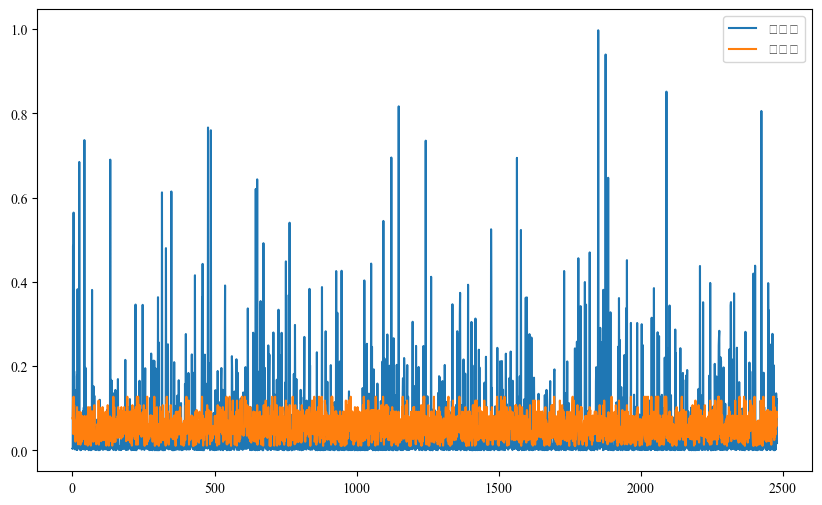

In [44]:
# 可视化对比预测值和真实值
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='真实值')
plt.plot(y_pred, label='预测值')
plt.legend()
plt.show()

In [45]:
import numpy as np

# 创建一个网格搜索最优条件
temperature_range = np.linspace(data["温度，oC"].min(), data["温度，oC"].max(), 100)
material_range = np.arange(data["磁芯材料"].nunique())
waveform_range = np.arange(data["励磁波形"].nunique())

# 初始化最小损耗和最优条件
min_loss = float('inf')
optimal_conditions = None

# 网格搜索
for temp in temperature_range:
    for material in material_range:
        for waveform in waveform_range:
            one_hot_material = np.zeros(data["磁芯材料"].nunique())
            one_hot_material[material] = 1
            one_hot_waveform = np.zeros(data["励磁波形"].nunique())
            one_hot_waveform[waveform] = 1
            conditions = np.array([temp] + list(one_hot_material) + list(one_hot_waveform)).reshape(1, -1)
            predicted_loss = model.predict(conditions)
            if predicted_loss < min_loss:
                min_loss = predicted_loss
                optimal_conditions = conditions

print("最优条件:", optimal_conditions)
print("最小损耗:", min_loss)

最优条件: [[25.  0.  0.  0.  1.  1.  0.  0.]]
最小损耗: [0.01058655]
